# Question 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

    Create the data table

In [2]:
data = {'Q':[80,150,135,165,95,130,110],
     'L':[60,100,100,120,70,90,80],
     'K':[50,100,80,100,60,80,70] }
pf = pd.DataFrame (data, index = ['B','C','D','E','F','G','H'])

pf

,Q,L,K
B,80,60,50
C,150,100,100
D,135,100,80
E,165,120,100
F,95,70,60
G,130,90,80
H,110,80,70


# Part(a) 
    Calculate mean, variance, sd and median values

In [3]:
data = {'Q':[np.mean(pf['Q']),np.var(pf['Q']),np.std(pf['Q']),np.median(pf['Q'])],
'L':[np.mean(pf['L']),np.var(pf['L']),np.std(pf['L']),np.median(pf['L'])],
'K':[np.mean(pf['K']),np.var(pf['K']),np.std(pf['K']),np.median(pf['K'])]}

pd.DataFrame (data, index = ['mean','var','std','median'])


,Q,L,K
mean,123.571429,88.571429,77.142857
var,783.673469,355.102041,306.122449
std,27.994168,18.844151,17.496355
median,130.000000,90.000000,80.000000


# Part(b) 
    Plot histograms of Q and L

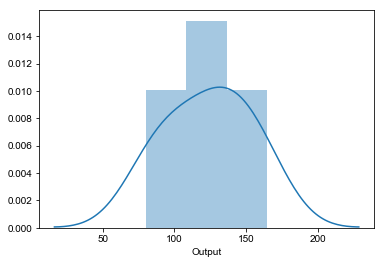

In [4]:
Output = pf['Q']
histQ = sns.distplot(Output)
histQ.set_xlabel('Output')
sns.set_style('darkgrid')

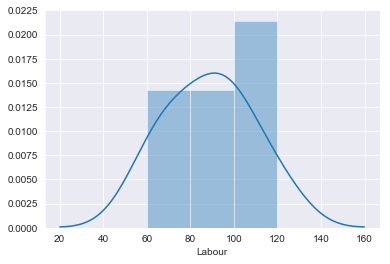

In [5]:
Labour = pf['L']
histL = sns.distplot(Labour)
histL.set_xlabel('Labour')
sns.set_style('darkgrid')

# Part(c)
    Take a log transform of the data

In [6]:
log_pf = np.log(pf)
log_pf

,Q,L,K
B,4.382027,4.094345,3.912023
C,5.010635,4.605170,4.605170
D,4.905275,4.605170,4.382027
E,5.105945,4.787492,4.605170
F,4.553877,4.248495,4.094345
G,4.867534,4.499810,4.382027
H,4.700480,4.382027,4.248495


# Part(d)
    Fit a mulitple regression model

In [7]:
fittedmodel = smf.ols(formula = 'Q ~ L + K' , data = log_pf).fit()
print(fittedmodel.params)

Intercept    0.146233
L            0.548427
K            0.508741
dtype: float64


    Check if α+β=1

In [8]:
alpha = fittedmodel.params[1]
beta = fittedmodel.params[2]
print ('α+β =', alpha+beta)

α+β = 1.0571684057723623


# Part(e)
    Plot the residuals of the fitted model

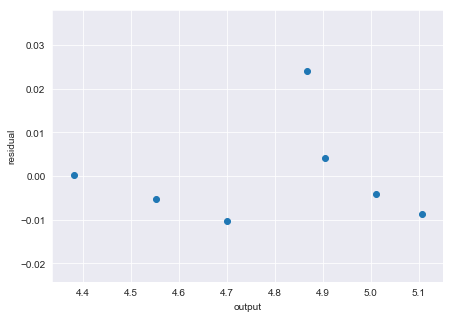

In [9]:
plt.figure(figsize = (7,5))
plt.scatter(log_pf['Q'],fittedmodel.resid)
plt.xlabel('output')
plt.ylabel('residual')
plt.show()

# Part(f)
    Calculate the adjusted R^2

In [10]:
print('The adjusted R squared is:' , fittedmodel.rsquared_adj) 

The adjusted R squared is: 0.9968763418198051


In [11]:
print(fittedmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        04:16:49   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.2

/anaconda3/envs/py3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
